In [1]:
#Import the required lybraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import fundamentalanalysis as fa
import yfinance as yf

In [2]:
api="70bafc9e930c8257b84552a4ef6e7f88"
class Price_analysis:
    def __init__(self,ticker,api_key,**kwargs):
        self.ticker=ticker
        self.api_key=api_key
        self.dcf_annually = fa.discounted_cash_flow(self.ticker, self.api_key, period="annual")
        super().__init__(**kwargs)
    def Value_analysis(self):
        return self.dcf_annually
    def show_plot(self):
        x = self.dcf_annually.iloc[1]
        y= self.dcf_annually.iloc[2]
        plt.figure(figsize=(15,5))
        plt.plot(x,label="Actual price")
        plt.plot(y,label="Projected price")
       
        plt.legend()
    def balance_sheet(self):
        cash_flow_statement_annually = fa.cash_flow_statement(self.ticker, self.api_key, period="annual")
        return cash_flow_statement_annually
    def buy_or_sell(self,tckr):
        hist_ticker=yf.Ticker(tckr)
        hist = hist_ticker.history(period="1mo")
        min=hist[["Open","Close"]].describe()
        max=hist[["Open","Close"]].describe()
        if self.dcf_annually["2023"].iloc[1]>self.dcf_annually["2023"].iloc[1]:
            Buy_sell_price= print("Sell")
            Range=print(f"Sell between {max['Close'].iloc[7]} and {max['Close'].iloc[6]}")  
        else:
            Buy_sell_price= print("Buy")
            Range=print(f"Buy between {min['Close'].iloc[3]} and {min['Close'].iloc[4]}")
            
          
        return Buy_sell_price,Range

In [3]:
ticker="TSM"
Price_analysis=Price_analysis(ticker,api)

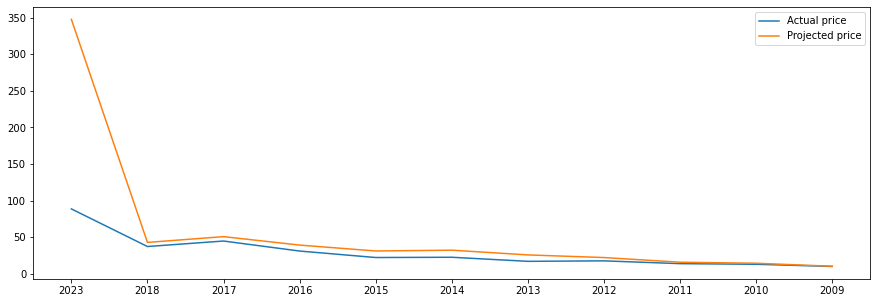

In [4]:
Price_analysis.show_plot()

In [5]:
Price_analysis.Value_analysis()

,2023,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
date,2023-03-07,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,2012-12-31,2011-12-31,2010-12-31,2009-12-31
Stock Price,88.7576,37.380001,44.880001,31.190001,22.35,22.709999,17.139999,17.799999,13.98,13.11,10.16
DCF,347.684404,42.997146,50.879404,39.330013,31.276904,32.377865,25.905042,22.312636,15.94632,14.536565,10.42284


In [6]:
Price_analysis.balance_sheet()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997
reportedCurrency,TWD,TWD,TWD,TWD,TWD,TWD,TWD,TWD,TWD,TWD,...,TWD,TWD,TWD,TWD,TWD,TWD,TWD,TWD,TWD,TWD
cik,0001046179,0001046179,0001046179,0001046179,0001046179,0001046179,0001046179,0001046179,0001046179,0001046179,...,0001046179,0001046179,0001046179,0001046179,0001046179,0001046179,0001046179,0001046179,0001046179,0001046179
fillingDate,2022-12-31,2022-04-14,2021-04-16,2020-04-15,2019-04-17,2018-04-19,2017-04-13,2016-04-11,2015-04-13,2014-04-14,...,2007-04-20,2006-04-20,2005-05-16,2004-05-28,2003-06-23,2002-05-09,2000-12-31,1999-12-31,1998-12-31,1997-12-31
acceptedDate,2022-12-30 19:00:00,2022-04-14 06:49:10,2021-04-16 07:58:57,2020-04-15 06:35:58,2019-04-17 07:21:35,2018-04-19 07:56:01,2017-04-13 07:18:42,2016-04-11 07:53:35,2015-04-13 08:05:34,2014-04-14 06:57:39,...,2007-04-20 06:24:39,2006-04-20 07:37:26,2005-05-16 07:46:03,2004-05-28 07:19:19,2003-06-23 14:44:52,2002-05-14 11:53:12,2000-12-30 19:00:00,1999-12-30 19:00:00,1998-12-30 19:00:00,1997-12-30 19:00:00
calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
netIncome,1144190718000,663036000000,584746300000,389862100000,397543100000,396161900000,385921700000,350477600000,302073500000,215961500000,...,126990145084,93855039630,92456415240,47164689540,21647896463.970001,14483183903.76,65106219696.639999,24563030085.400002,15315966554,18011756512.959999
depreciationAndAmortization,437254273000,422394900000,331724600000,286884200000,292546300000,260142700000,223828400000,222505600000,200251500000,156181800000,...,73707202140,75997037690,69952454040,69032263380,65113845920.029999,48875776268.879997,41446122346.339996,18043634580.82,15270862740,9790638558.4
deferredIncomeTax,0,0,0,0,0,0,0,0,0,0,...,120564389,-3363050295,-1045958760,3667232880,5430434986.25,-3840769783.84,-956125747.5,-383748357.6,-2355063431,-1934607442.88
stockBasedCompensation,302348000,7800000,6600000,2800000,0,0,0,0,0,5300000,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Price_analysis.buy_or_sell(ticker)

Buy
Buy between 86.83000183105469 and 88.34249877929688


(None, None)